In [89]:
import os
from skimage import io
import numpy as np
import torch

idx = 2

dir_dataset = 'data/USC'
dir_Rx = dir_dataset+ "/Rx/" 
img_name_Rx = os.path.join(dir_Rx, str(idx)) + ".png"
image_Rx = torch.from_numpy(io.imread(img_name_Rx))

dir_power = dir_dataset+ "/pmap/" 
img_name_power = os.path.join(dir_power, str(idx)) + ".png"
image_power = torch.from_numpy(io.imread(img_name_power))

dir_buildings = dir_dataset+ "/map/" 
img_name_buildings = os.path.join(dir_buildings, str(idx)) + ".png"
image_buildings = torch.from_numpy(io.imread(img_name_buildings))

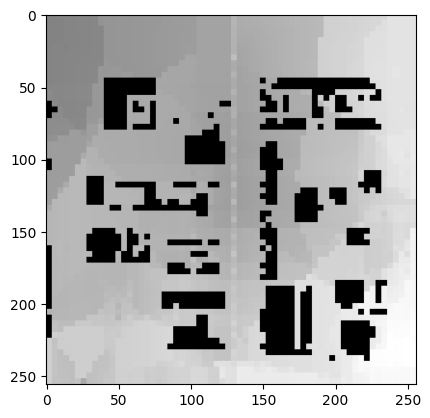

In [90]:
import matplotlib.pyplot as plt

img_4_show = image_power[:,:].unsqueeze(0).permute(1,2,0)


plt.imshow(img_4_show.squeeze(), cmap='gray')
plt.show()

In [91]:
image_Rx[image_buildings == 255] = 0
xs, ys =  torch.nonzero(image_Rx, as_tuple=True)
power_values = image_power[xs,ys]
indices = torch.full_like(power_values, idx)
samples = torch.stack((indices, xs,ys, power_values),dim=1)
print(samples.shape)

torch.Size([960, 4])


In [92]:
import torch
import pandas as pd

# Convert tensor to Pandas DataFrame
df = pd.DataFrame(samples.numpy())

# Save DataFrame to CSV
df.to_csv(dir_dataset + '/samples.csv', mode='a', index=False, header=False)


In [96]:
dir_dataset = 'data/USC'
dir_Rx = dir_dataset+ "/Rx/" 
dir_power = dir_dataset+ "/pmap/" 
dir_buildings = dir_dataset+ "/map/" 
log_interval = 100

for idx in range(1, 19017):
    if (idx % log_interval == 0):
        print("Processing image: {} / 19016 ({:.1%})".format(idx,idx/19016))
    img_name_Rx = os.path.join(dir_Rx, str(idx)) + ".png"
    image_Rx = torch.from_numpy(io.imread(img_name_Rx))
    img_name_power = os.path.join(dir_power, str(idx)) + ".png"
    image_power = torch.from_numpy(io.imread(img_name_power))
    img_name_buildings = os.path.join(dir_buildings, str(idx)) + ".png"
    image_buildings = torch.from_numpy(io.imread(img_name_buildings))
    
    image_Rx[image_buildings == 255] = 0
    xs, ys =  torch.nonzero(image_Rx, as_tuple=True)
    power_values = image_power[xs,ys]
    indices = torch.full_like(power_values, idx, dtype=torch.int32)
    samples = torch.stack((indices, xs,ys, power_values),dim=1)
    
    # Convert tensor to Pandas DataFrame
    df = pd.DataFrame(samples.numpy())

    # Save DataFrame to CSV
    df.to_csv(dir_dataset + '/samples.csv', mode='a', index=False, header=False)
    if (idx % log_interval == 0):
        print("Added to samples {} new entries".format(samples.size(0)))


Processing image: 100 / 19016 (0.526%)
Added to samples 2032 new entries
Processing image: 200 / 19016 (1.052%)
Added to samples 1376 new entries
Processing image: 300 / 19016 (1.578%)
Added to samples 1680 new entries
Processing image: 400 / 19016 (2.103%)
Added to samples 1760 new entries
Processing image: 500 / 19016 (2.629%)
Added to samples 1632 new entries
Processing image: 600 / 19016 (3.155%)
Added to samples 1744 new entries
Processing image: 700 / 19016 (3.681%)
Added to samples 1520 new entries
Processing image: 800 / 19016 (4.207%)
Added to samples 1616 new entries
Processing image: 900 / 19016 (4.733%)
Added to samples 1664 new entries
Processing image: 1000 / 19016 (5.259%)
Added to samples 1344 new entries
Processing image: 1100 / 19016 (5.785%)
Added to samples 1440 new entries
Processing image: 1200 / 19016 (6.310%)
Added to samples 1600 new entries
Processing image: 1300 / 19016 (6.836%)
Added to samples 1696 new entries
Processing image: 1400 / 19016 (7.362%)
Added t

Processing image: 11100 / 19016 (58.372%)
Added to samples 3344 new entries
Processing image: 11200 / 19016 (58.898%)
Added to samples 4720 new entries
Processing image: 11300 / 19016 (59.424%)
Added to samples 2336 new entries
Processing image: 11400 / 19016 (59.950%)
Added to samples 3696 new entries
Processing image: 11500 / 19016 (60.475%)
Added to samples 4704 new entries
Processing image: 11600 / 19016 (61.001%)
Added to samples 3744 new entries
Processing image: 11700 / 19016 (61.527%)
Added to samples 2560 new entries
Processing image: 11800 / 19016 (62.053%)
Added to samples 2752 new entries
Processing image: 11900 / 19016 (62.579%)
Added to samples 3536 new entries
Processing image: 12000 / 19016 (63.105%)
Added to samples 3888 new entries
Processing image: 12100 / 19016 (63.631%)
Added to samples 3904 new entries
Processing image: 12200 / 19016 (64.156%)
Added to samples 3936 new entries
Processing image: 12300 / 19016 (64.682%)
Added to samples 4688 new entries
Processing i